In [256]:
# Solve for reciprocal distribution parameters a, b given target mean and variance.
import numpy as np
from scipy.optimize import least_squares
from scipy.stats import reciprocal

def moments_from_ab(a, b):
    L = np.log(b / a)
    mean = (b - a) / L
    second_moment = (b**2 - a**2) / (2 * L)
    var = second_moment - mean**2
    return mean, var

def solve_ab_from_moments(mu_target, var_target, x0=None):
    # parameterize with logs to enforce positivity and ordering
    # u = log(a), v = log(b) with constraint v > u + eps
    eps = 1e-6
    if x0 is None:
        # initial guess: center geometric mean at mu_target, spread based on variance heuristic
        # pick a0 = mu / 10, b0 = mu * 10 as a generic start
        a0, b0 = max(1e-6, mu_target/10), mu_target*10 if mu_target>0 else 10.0
        x0 = np.log([a0, b0])
    def residuals(uv):
        u, v = uv
        # enforce v > u+eps by penalizing if violated
        if v <= u + eps:
            return np.array([1e6, 1e6])
        a, b = np.exp(u), np.exp(v)
        mean, var = moments_from_ab(a, b)
        return np.array([mean - mu_target, var - var_target])
    sol = least_squares(residuals, x0, xtol=1e-8, ftol=1e-8, gtol=1e-8, max_nfev=2000)
    if not sol.success:
        raise RuntimeError("Solver failed: " + sol.message)
    a, b = np.exp(sol.x)
    return a, b

# Example target moments
mu_target = 562.5
var_target = 7.9375e6

a, b = solve_ab_from_moments(mu_target, var_target)
mean_res, var_res = moments_from_ab(a, b)
samples = reciprocal(a, b).rvs(size=200000)

print("Target mean, var:", mu_target, var_target)
print("Solved a, b:", a, b)
print("Moments from formulas: mean = {:.12g}, var = {:.12g}".format(mean_res, var_res))
print("Sampled moments:      mean = {:.12g}, var = {:.12g}".format(samples.mean(), samples.var(ddof=0)))
print("Differences (formula-target):", mean_res - mu_target, var_res - var_target)
# print("Solver message:", sol.message)


RuntimeError: Solver failed: The maximum number of function evaluations is exceeded.

25 25 25


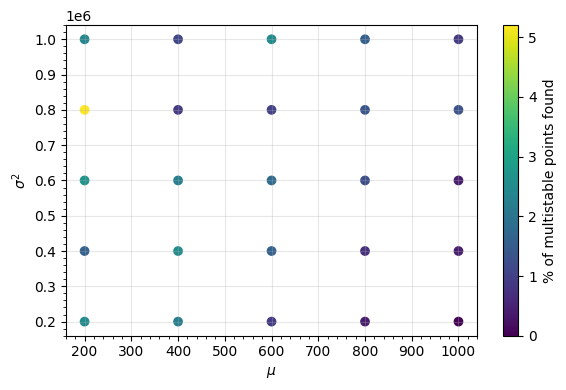

In [244]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
u_array = np.array([200, 200, 200, 200, 200, 400, 400, 400, 400, 400, 600, 600, 600, 600, 600, 800, 800, 800, 800, 800, 1e3, 1e3, 1e3, 1e3, 1e3])
v_array = np.array([2e5, 4e5, 6e5, 8e5, 1e6, 2e5, 4e5, 6e5, 8e5, 1e6, 2e5, 4e5, 6e5, 8e5, 1e6, 2e5, 4e5, 6e5, 8e5, 1e6, 2e5, 4e5, 6e5, 8e5, 1e6])
num_multistable = np.array([25, 16, 27, 52, 24, 22, 25, 22, 9, 11, 9, 16, 18, 10, 25, 4, 7, 12, 14, 16, 0, 4, 4, 13, 9])
print(len(u_array), len(v_array), len(num_multistable))
num_multistable = 100 * num_multistable / 1000
sc = plt.scatter(u_array, v_array, c = num_multistable, cmap = "viridis")
plt.colorbar(sc, label='% of multistable points found')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma^2$")
plt.grid(True, alpha=0.3)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [251]:
import os
import 
mu = 1000
var = 1e7
os.system(f"ADVANCED_ROOT_FINDING_SCRIPT.py {mu} {var}")

sh: ADVANCED_ROOT_FINDING_SCRIPT.py: command not found


32512

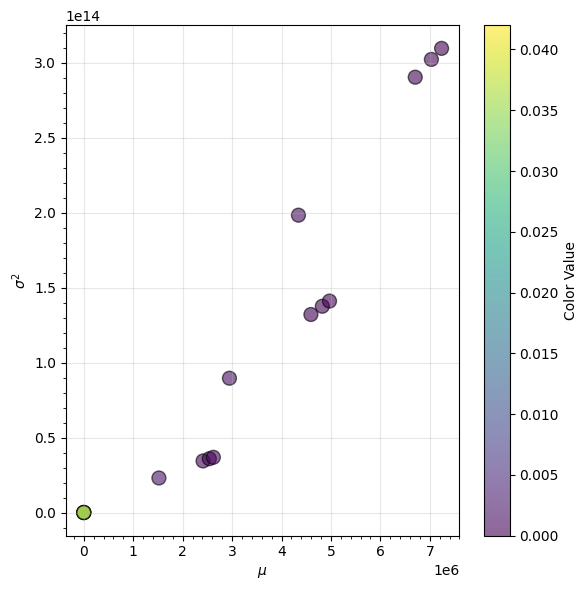

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def u_v_solver(a, b):
    u = (b - a) / (np.log(b / a))
    v = ((b**2 - a**2) / (2 * np.log(b / a))) - u**2
    return (u, v)

num = 4

a_array = np.linspace(1e-2, 100, num)
b_array = np.linspace(1000, 1e8, num)

# Create meshgrids of a and b values
A_mesh, B_mesh = np.meshgrid(a_array, b_array)

# Compute u and v for each (a, b) pair
U_mesh, V_mesh = u_v_solver(A_mesh, B_mesh)

# Flatten for scatter plot
u = U_mesh.flatten()
v = V_mesh.flatten()

# Color array (4x4 = 16 values to match the 16 points)
colours = np.array([[101/5000, 71/5000, 42/1000, 35/1000],
                    [11/5000, 1/5000, 2/5000, 4/5000],
                    [7/5000, 0, 1/5000, 2/5000],
                    [6/5000, 2/5000, 2/5000, 1/5000]])

# Create figure first
plt.figure(figsize=(6, 6))

# Create scatter plot
scatter = plt.scatter(u, v, c=colours.flatten(), cmap='viridis', 
                      s=100, alpha=0.6, edgecolors='black')

# Add color bar
plt.colorbar(scatter, label='Color Value')

# Labels and title
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma^2$")
plt.grid(True, alpha=0.3)
plt.minorticks_on()

plt.tight_layout()
plt.show()